In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DataSet/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
x=df.drop("Survived",axis=1)

In [15]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [6]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df[['Sex']])
df['Embarked']=le.fit_transform(df[['Embarked']])

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [8]:
df["Age"]=df.Age.fillna(np.mean(df.Age))

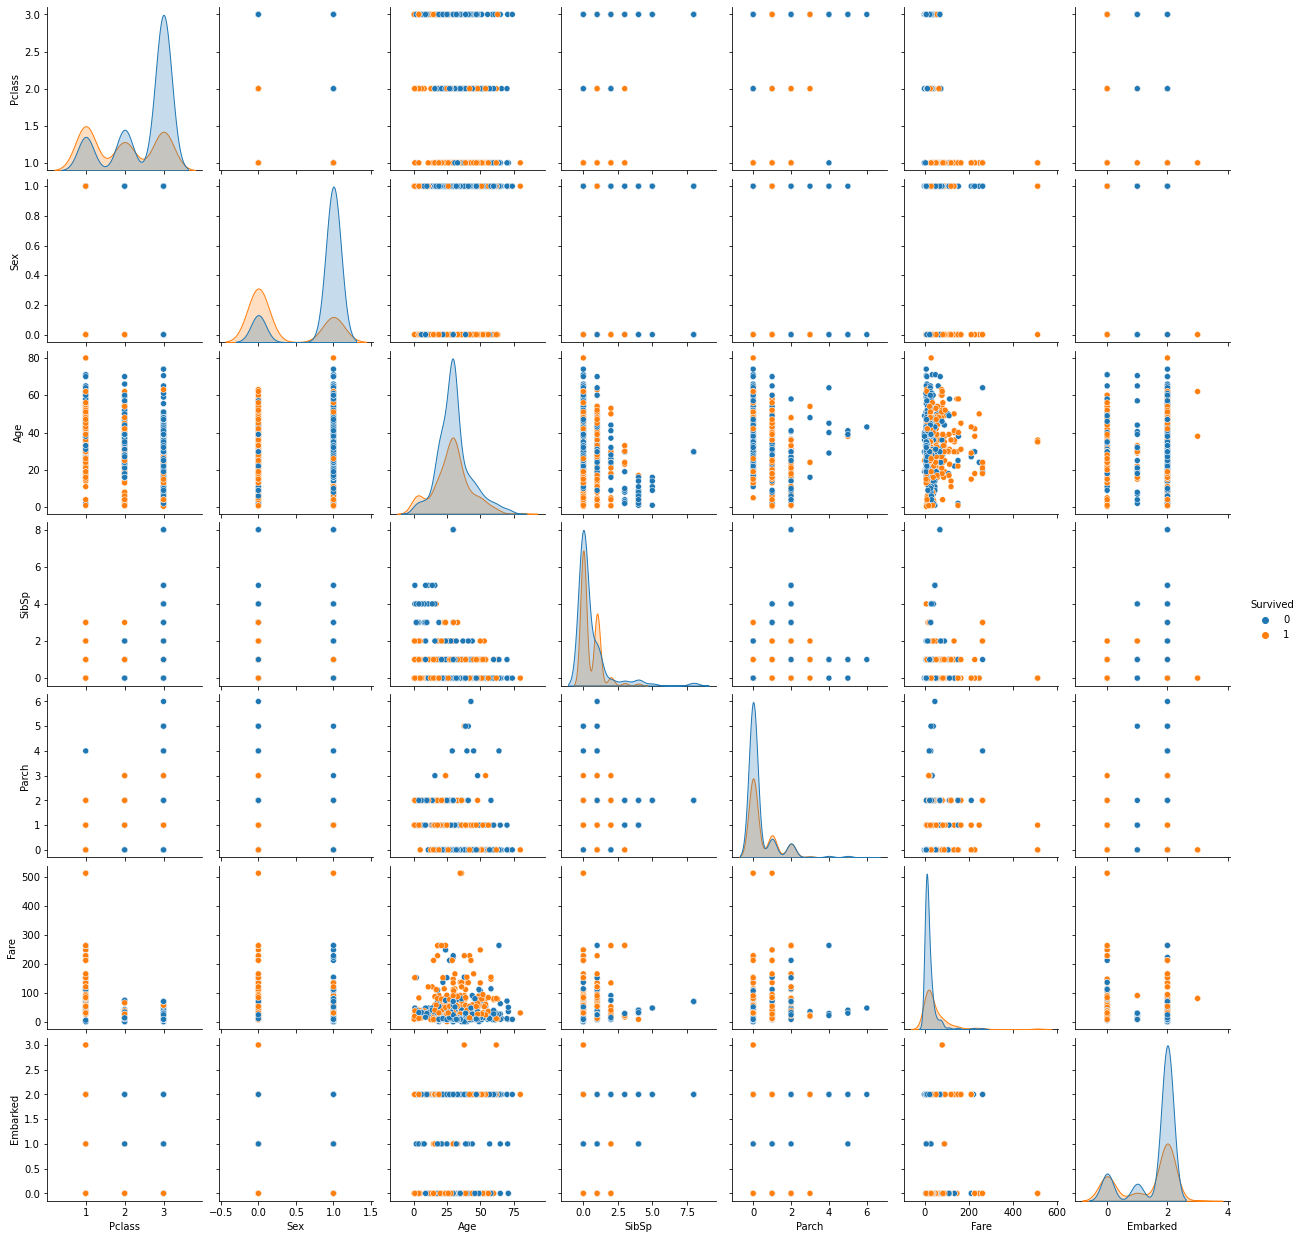

In [9]:
sns.pairplot(df,hue='Survived')

In [10]:
sse=[]
k_rngs=range(1,10)
for k in k_rngs:
    km=KMeans(n_clusters=k)
    km.fit(df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]])
    sse.append(km.inertia_)

In [11]:
sse

[2351302.845041572,
 1000062.2165982497,
 548366.513893226,
 344743.0493346363,
 254042.44151592138,
 189586.4789442275,
 144320.56774872908,
 121202.13003342281,
 105289.38184496577]

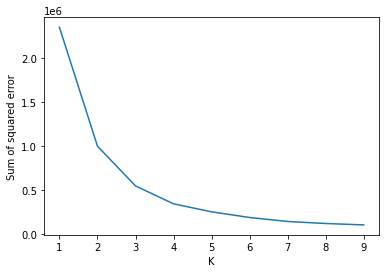

In [12]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rngs,sse)

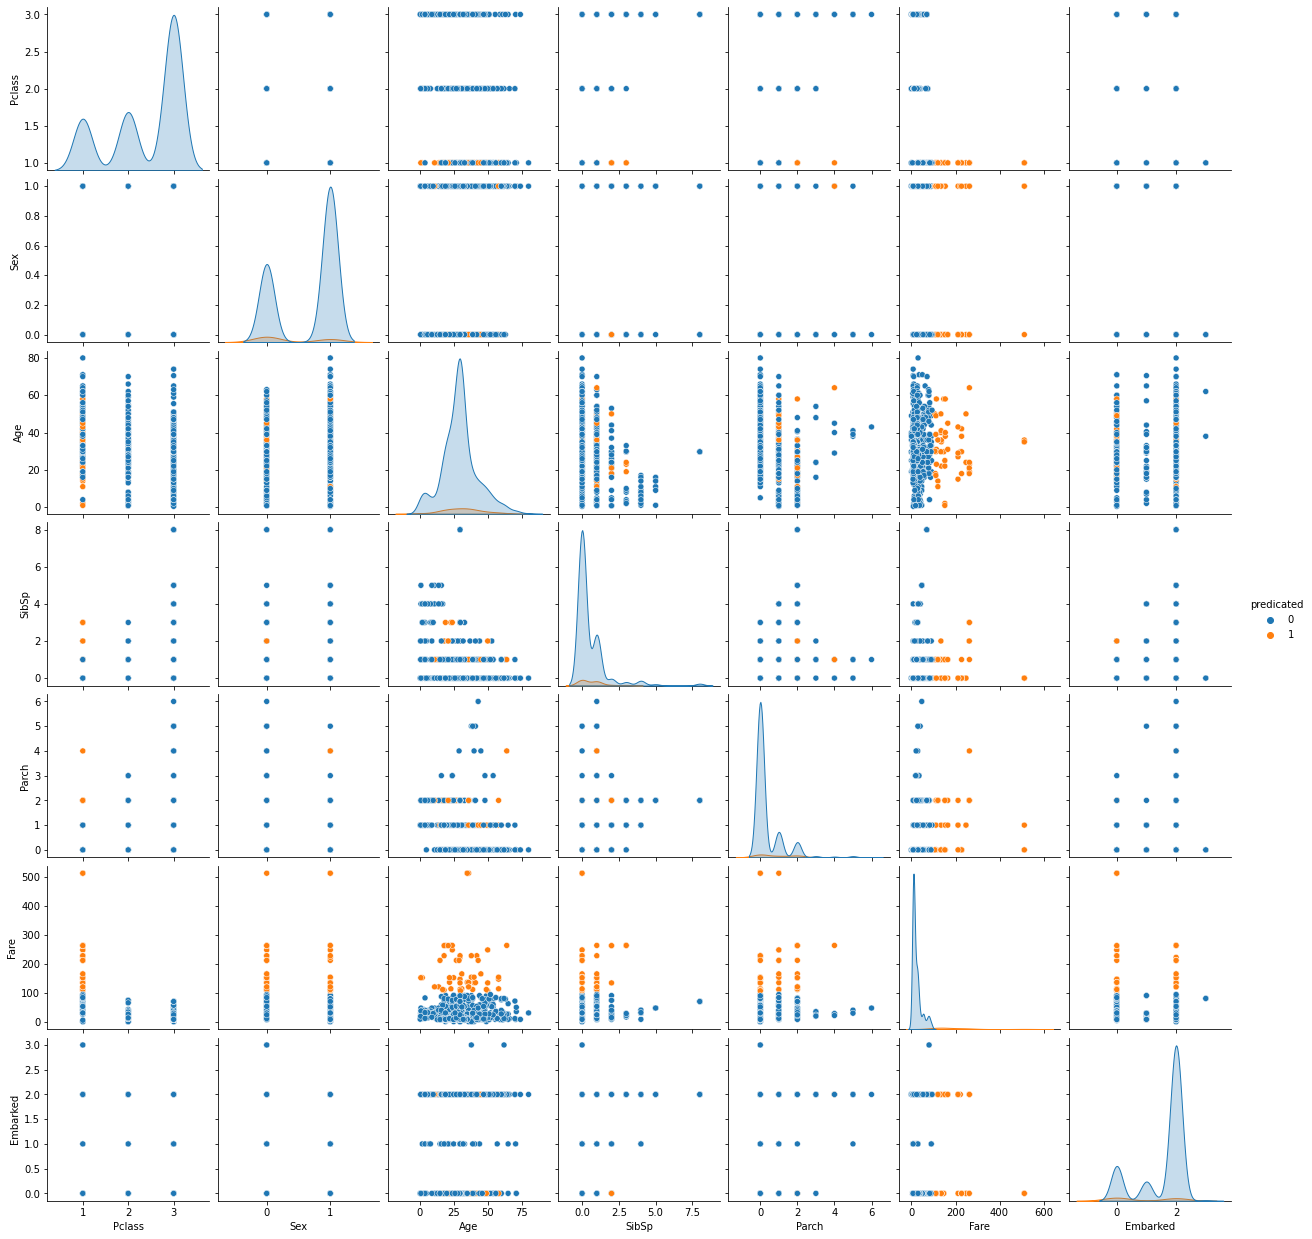

In [16]:
kmeans=KMeans(n_clusters=2,max_iter=1000,n_init=10,init='k-means++',random_state=123).fit(x)
clusters=kmeans.labels_
x["predicated"]=clusters
sns.pairplot(x,hue="predicated")